<a href="https://colab.research.google.com/github/NikhilBisai/Flight_Fare_Prediction/blob/main/Flight_fare_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [85]:
train_data=pd.read_excel(r"/content/Data_Train.xlsx")
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [86]:
pd.set_option('display.max_columns',None)

In [87]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [88]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [89]:
train_data.dropna(inplace=True)

In [90]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

**EDA**

In [91]:
train_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [92]:
duration=list(train_data["Duration"])

for i in range(len(duration)):
  if len((duration[i]).split())!=2:
    if "h" in duration[i]:
      duration[i]=duration[i]+" 0m"

    else:
      duration[i]="0h "+duration[i]

duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep="h")[0]))

  duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [93]:
train_data["Duration_hours"]=duration_hours
train_data["Duration_mins"]=duration_mins

In [94]:
train_data.drop(['Duration'],axis=1,inplace=True)


In [95]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,4,45


In [96]:
train_data["arrival_hour"]=pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data["arrival_mins"]=pd.to_datetime(train_data.Arrival_Time).dt.minute

In [97]:
train_data.drop(["Arrival_Time"],axis=1,inplace=True)

In [98]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins,arrival_hour,arrival_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,non-stop,No info,3897,2,50,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,No info,7662,7,25,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,No info,13882,19,0,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,No info,6218,5,25,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,No info,13302,4,45,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,non-stop,No info,4107,2,30,22,25
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,non-stop,No info,4145,2,35,23,20
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,non-stop,No info,7229,3,0,11,20
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,non-stop,No info,12648,2,40,14,10


In [99]:
train_data["journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [100]:
train_data["journey_month"]=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.month

In [101]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins,arrival_hour,arrival_mins,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,non-stop,No info,3897,2,50,1,10,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,No info,7662,7,25,13,15,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,No info,13882,19,0,4,25,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,No info,6218,5,25,23,30,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,No info,13302,4,45,21,35,1,3


**Categorial Data**

In [102]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

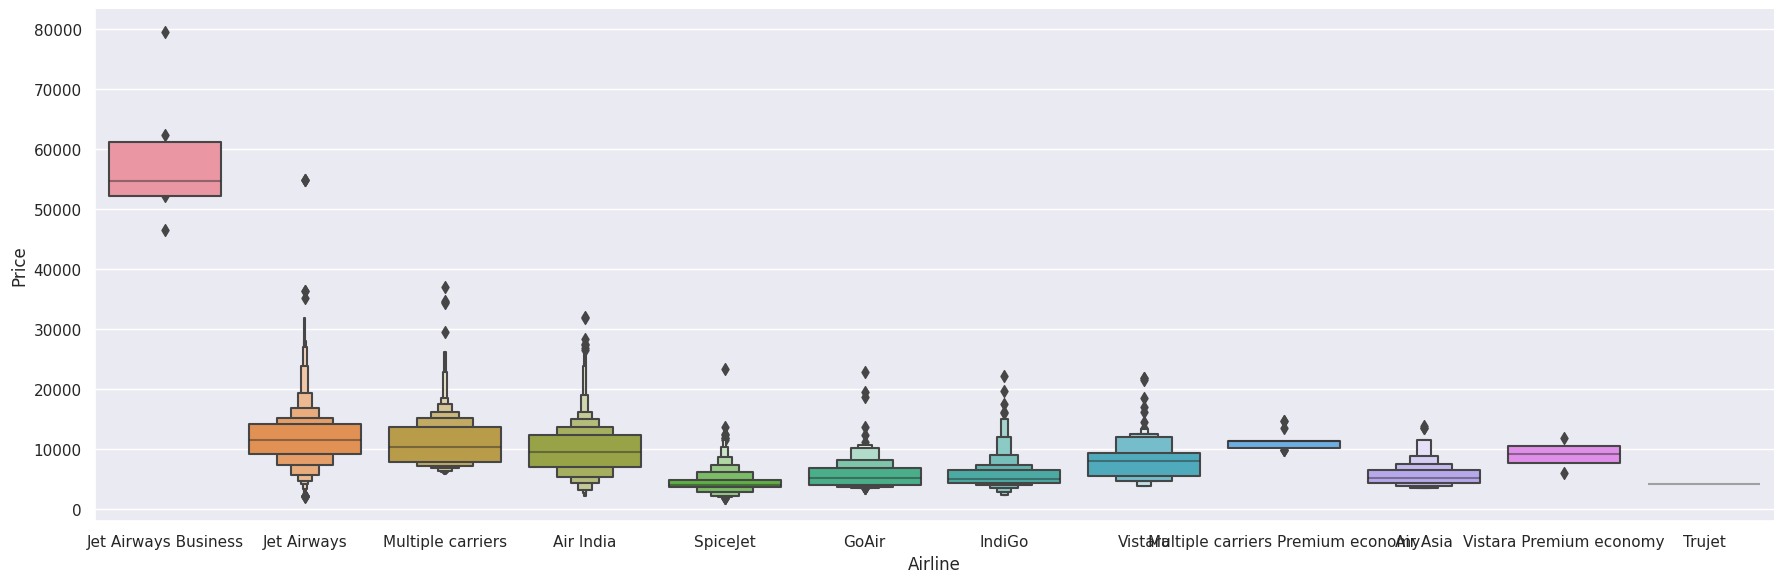

In [103]:
sns.catplot(y="Price",x="Airline",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [104]:
Airline=train_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [105]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [106]:
Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [107]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

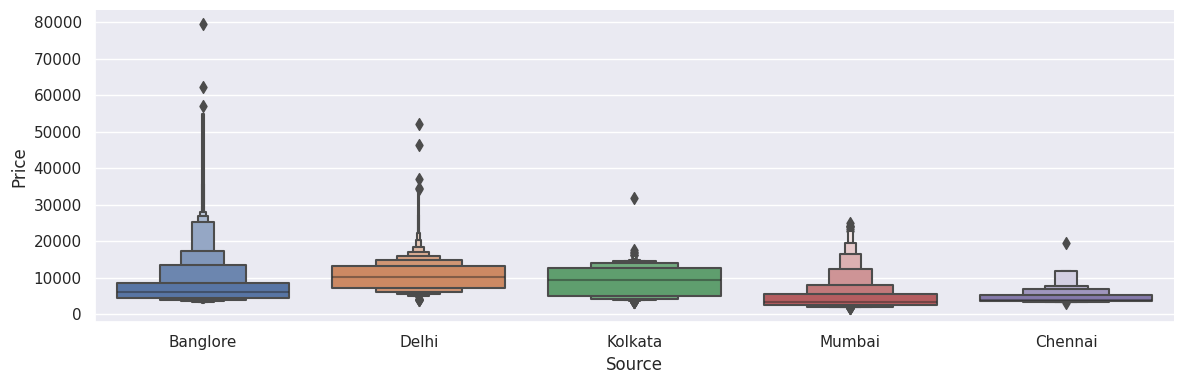

In [108]:
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [109]:
Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [110]:
#train_data.drop(["Route","Additional_Info"],axis=1,inplace=True)
train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [111]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price,Duration_hours,Duration_mins,arrival_hour,arrival_mins,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,non-stop,3897,2,50,1,10,24,3
1,Air India,1/05/2019,Kolkata,Banglore,05:50,2 stops,7662,7,25,13,15,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,2 stops,13882,19,0,4,25,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,1 stop,6218,5,25,23,30,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,1 stop,13302,4,45,21,35,1,3


In [112]:
train_data.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace=True)

In [113]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price,Duration_hours,Duration_mins,arrival_hour,arrival_mins,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,0,3897,2,50,1,10,24,3
1,Air India,1/05/2019,Kolkata,Banglore,05:50,2,7662,7,25,13,15,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,2,13882,19,0,4,25,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,1,6218,5,25,23,30,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,1,13302,4,45,21,35,1,3


In [114]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [115]:
data_train.drop(["Airline",	"Source",	"Destination"],axis=1,inplace=True)

In [116]:
data_train.head()

,Date_of_Journey,Dep_Time,Total_Stops,Price,Duration_hours,Duration_mins,arrival_hour,arrival_mins,journey_day,journey_month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,22:20,0,3897,2,50,1,10,24,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,05:50,2,7662,7,25,13,15,1,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,09:25,2,13882,19,0,4,25,9,6,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,18:05,1,6218,5,25,23,30,12,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,16:50,1,13302,4,45,21,35,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [117]:
data_train.drop(['Date_of_Journey','Dep_Time'],axis=1,inplace=True)

In [118]:
data_train.head()

,Total_Stops,Price,Duration_hours,Duration_mins,arrival_hour,arrival_mins,journey_day,journey_month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,2,50,1,10,24,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,7,25,13,15,1,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,19,0,4,25,9,6,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,25,23,30,12,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,4,45,21,35,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Feature selection**

In [119]:
data_train.shape

(10682, 28)

In [120]:
data_train.columns

Index(['Total_Stops', 'Price', 'Duration_hours', 'Duration_mins',
       'arrival_hour', 'arrival_mins', 'journey_day', 'journey_month',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [121]:
X = data_train.loc[:, ['Total_Stops', 'Duration_hours', 'Duration_mins',
       'arrival_hour', 'arrival_mins', 'journey_day', 'journey_month',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Duration_hours,Duration_mins,arrival_hour,arrival_mins,journey_day,journey_month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,2,50,1,10,24,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7,25,13,15,1,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,19,0,4,25,9,6,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,5,25,23,30,12,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,4,45,21,35,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [122]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

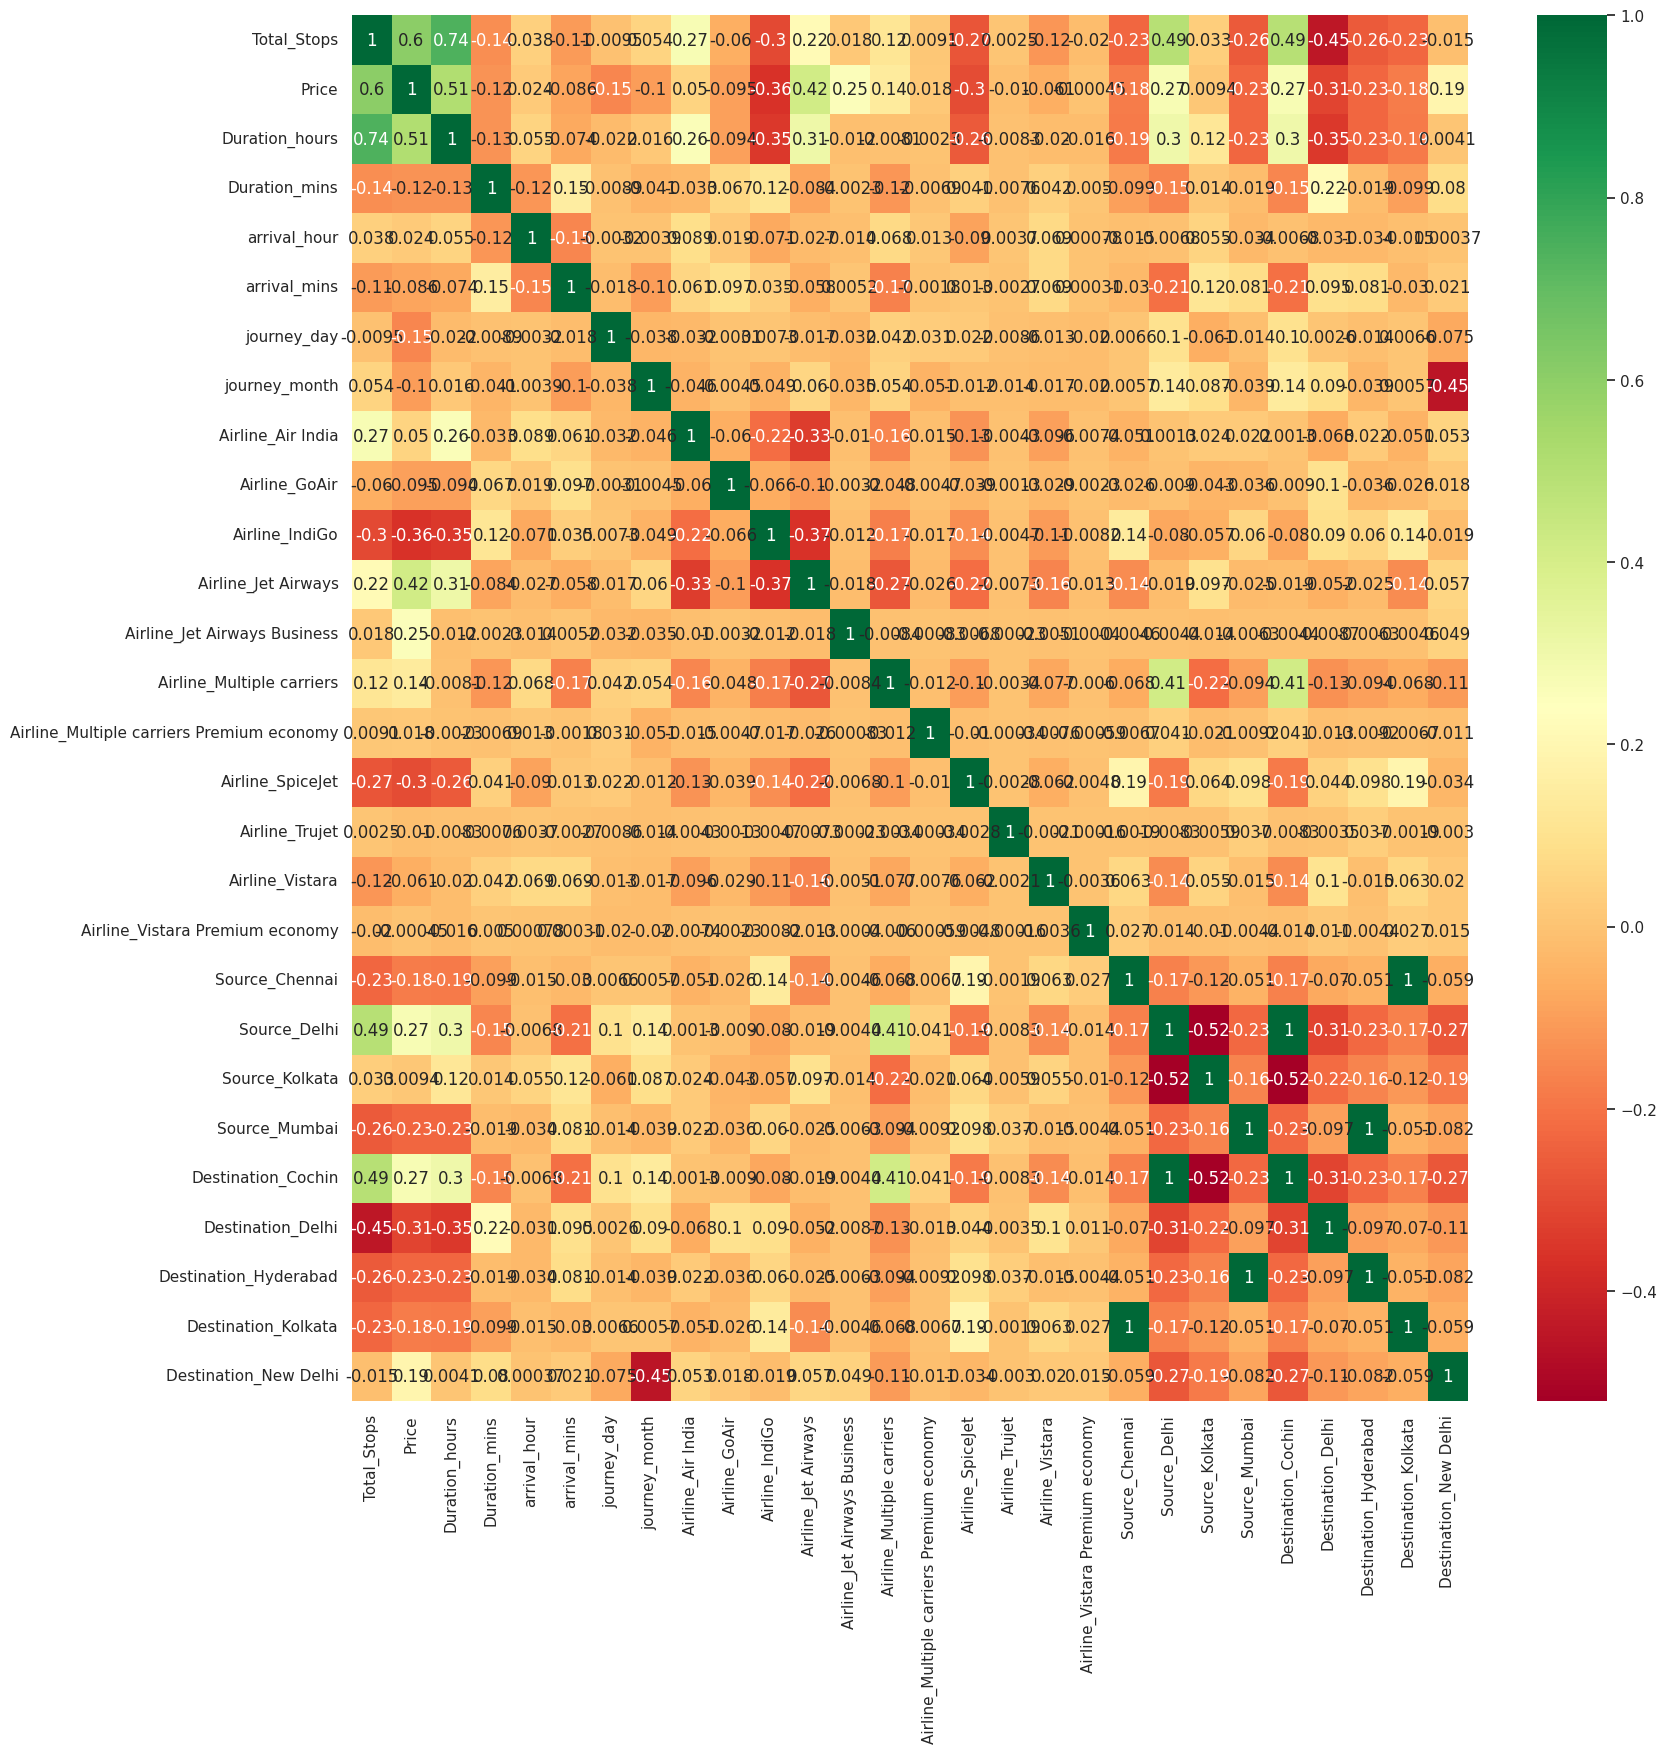

In [123]:
plt.figure(figsize=(18,18))
sns.heatmap(data_train.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [127]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [128]:
print(selection.feature_importances_)

[2.13494897e-01 1.37155243e-01 3.23878407e-02 3.77957611e-02
 2.73269088e-02 1.43667069e-01 5.33465600e-02 9.33834536e-03
 1.71947288e-03 1.80219436e-02 1.46401096e-01 6.81234521e-02
 1.76811531e-02 8.66797860e-04 3.41058203e-03 9.12421734e-05
 5.15457121e-03 8.69640651e-05 4.34025099e-04 1.35625840e-02
 2.89799764e-03 7.93760561e-03 1.24573497e-02 1.61752697e-02
 4.77734459e-03 5.06051231e-04 2.51818728e-02]


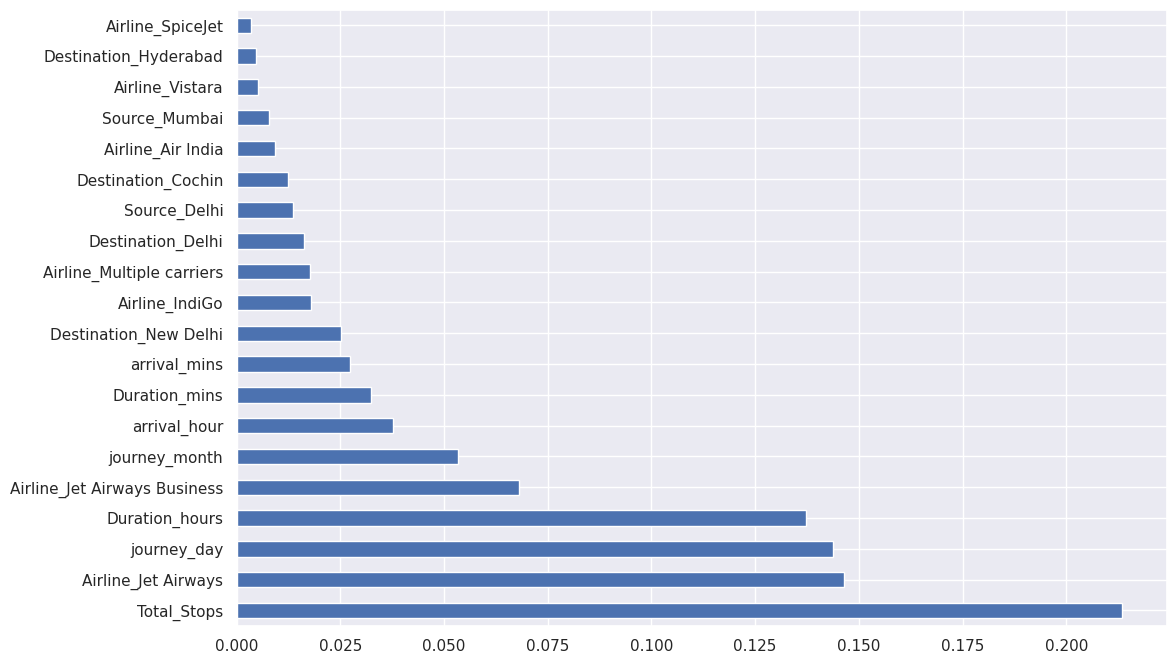

In [132]:
plt.figure(figsize=(12,8))
feat_importance=pd.Series(selection.feature_importances_,index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

**Random Forest**

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [134]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [136]:
y_pred=reg_rf.predict(X_test)

In [137]:
reg_rf.score(X_train,y_train)

0.9530250507435865

In [138]:
reg_rf.score(X_test,y_test)

0.7951968991617776

<ipython-input-141-75adb1dd5983>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


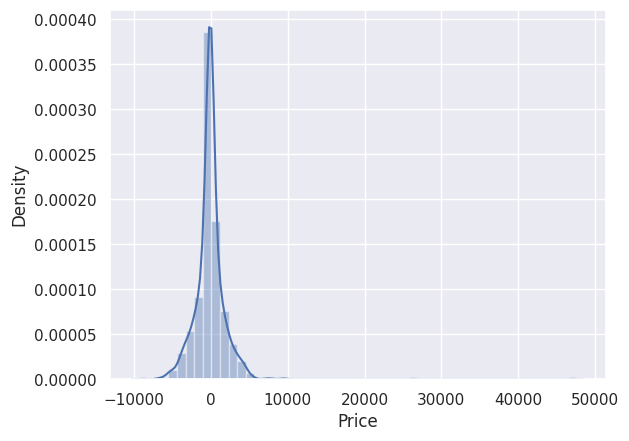

In [141]:
sns.distplot(y_test-y_pred)
plt.show()

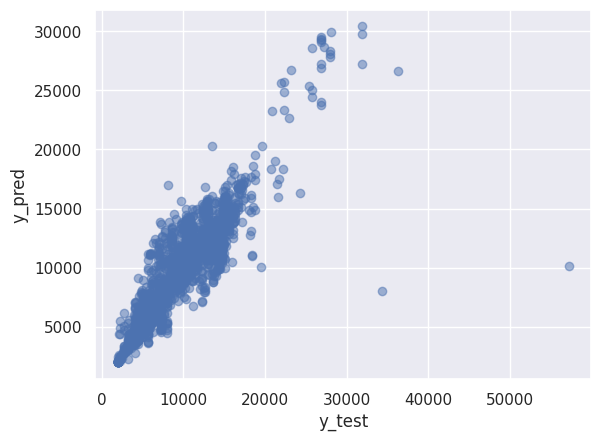

In [142]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()